In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def reg_r2(driver,bloomdate):
    A = np.vstack([driver, np.ones(len(driver))]).T
    m, c = np.linalg.lstsq(A, bloomdate,rcond=None)[0]
    m=round(m,3)
    c=round(c,2)
    y = m*driver + c
    model, resid = np.linalg.lstsq(A, bloomdate,rcond=None)[:2]
    r2 = 1 - resid / (len(bloomdate) * np.var(bloomdate))
    return y, r2, m, c

In [34]:
x=2*np.random.rand(50)

In [35]:
y=3*np.random.rand(50)

In [ ]:
# z=Ax+By+Cr+noise

In [ ]:
# RES = z - (B*y+Cb) = Ax+C+noise

In [ ]:
# res2= z- (B*y) - (A*x) = Cr+noise

In [36]:
z=1*x+3*y+.1*np.random.rand(50)

Text(0, 0.5, 'Bloom Date')

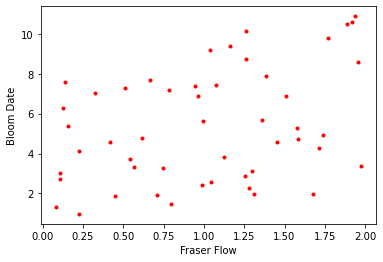

In [43]:
plt.plot(x,z,'r.')
plt.xlabel('Fraser Flow')
plt.ylabel('Bloom Date')

In [38]:
yy, r2, m, c = reg_r2(y,z)

Text(0, 0.5, 'Bloom Date')

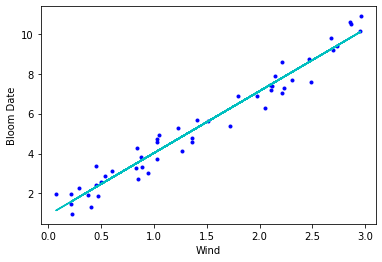

In [44]:
plt.plot(y,z,'b.')
y2=np.arange(0,4)
plt.plot(y,m*y+c,'c-')
plt.xlabel('Wind')
plt.ylabel('Bloom Date')

Text(0, 0.5, 'residual (z- m*y-cy)')

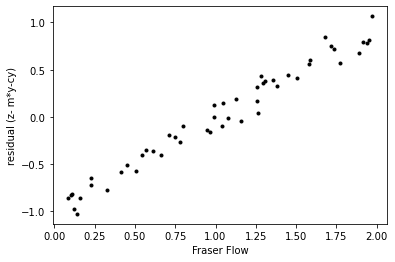

In [45]:
plt.plot(x,z-(m*y+c),'k.')
plt.xlabel('Fraser Flow')
plt.ylabel('residual (z- m*y-cy)')

In [41]:
yy, r2, mx, cx = reg_r2(x,z-(m*y+c))

In [42]:
mx,cx

(0.96, -0.97)

In [47]:
import netCDF4 as nc

In [48]:
f=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_grid_T.nc')

In [49]:
f.variables.keys()

dict_keys(['time_counter', 'nav_lat', 'nav_lon', 'deptht', 'sossheig', 'votemper', 'vosaline'])

In [50]:
import gsw

In [52]:
sigma=gsw.sigma0(f.variables['vosaline'][:,:,:,:],f.variables['votemper'][:,:,:,:])

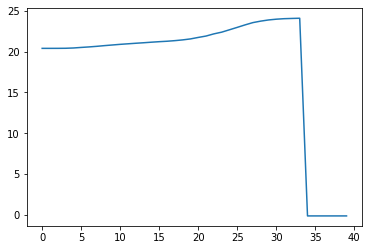

In [61]:
plt.plot(sigma[0,:,450,258])

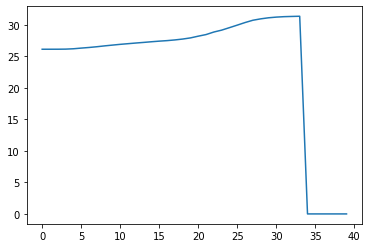

In [62]:
plt.plot(f.variables['vosaline'][0,:,450,258])

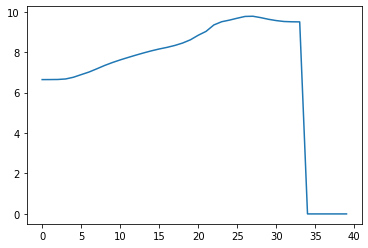

In [63]:
plt.plot(f.variables['votemper'][0,:,450,258])

In [58]:
from salishsea_tools import places

In [60]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}